<a href="https://colab.research.google.com/github/gyeongdong13/Project/blob/main/O2b_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rc('font', family='NanumGothic')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CC GENERAL.csv', encoding='utf-8')
df

col_name = ['고객번호', '잔액', '잔액 업데이트 빈도', '구매금액', '일시불 구매금액', "할부 구매금액", "현금 선지급", "구매빈도", "일회성 구매빈도", "할부 구매빈도", "현금 선지급 빈도", "현금 선지급 거래수", "구매건수", "카드 한도", "지불금액","지불한 최소금액", "지불한 전액 지불비율","카드 서비스 기간"]
df.columns = col_name

In [ ]:
df2 = df[["구매금액", "일시불 구매금액", "구매건수", "할부 구매금액", "지불금액"]]
df2

,구매금액,일시불 구매금액,구매건수,할부 구매금액,지불금액
0,95.40,0.00,2,95.40,201.802084
1,0.00,0.00,0,0.00,4103.032597
2,773.17,773.17,12,0.00,622.066742
3,1499.00,1499.00,1,0.00,0.000000
4,16.00,16.00,1,0.00,678.334763
...,...,...,...,...,...
8945,291.12,0.00,6,291.12,325.594462
8946,300.00,0.00,6,300.00,275.861322
8947,144.40,0.00,5,144.40,81.270775
8948,0.00,0.00,0,0.00,52.549959


In [ ]:
# 로그 변환
df2_copy = df2.copy()
_purchase = np.log1p(df2_copy["지불금액"])
df2_copy.insert(0,"정규화 지불금액", _purchase)

sale_purchase = np.log1p(df2_copy["할부 구매금액"])
df2_copy.insert(0,"정규화 할부 구매금액", sale_purchase)

count_purchase = np.log1p(df2_copy["구매건수"])
df2_copy.insert(0,"정규화 구매건수", count_purchase)

oneoff_purchase = np.log1p(df2_copy["일시불 구매금액"])
df2_copy.insert(0,"정규화 일시불 구매금액", oneoff_purchase)

purchase = np.log1p(df2_copy["구매금액"])
df2_copy.insert(0,"정규화 구매금액", purchase)

df2_copy.drop(["구매금액", "일시불 구매금액", "구매건수", "할부 구매금액", "지불금액"], axis=1, inplace=True)
df2_copy

,정규화 구매금액,정규화 일시불 구매금액,정규화 구매건수,정규화 할부 구매금액,정규화 지불금액
0,4.568506,0.000000,1.098612,4.568506,5.312231
1,0.000000,0.000000,0.000000,0.000000,8.319725
2,6.651791,6.651791,2.564949,0.000000,6.434654
3,7.313220,7.313220,0.693147,0.000000,0.000000
4,2.833213,2.833213,0.693147,0.000000,6.521114
...,...,...,...,...,...
8945,5.677165,0.000000,1.945910,5.677165,5.788719
8946,5.707110,0.000000,1.945910,5.707110,5.623517
8947,4.979489,0.000000,1.791759,4.979489,4.410016
8948,0.000000,0.000000,0.000000,0.000000,3.980615


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

gmm = GaussianMixture(n_components=4, covariance_type = "diag", random_state=0, n_init=10)
gmm.fit(df2_copy)
gmm_label = gmm.predict(df2_copy)
df2_copy['gmm_label'] = gmm_label
df2_copy

,정규화 구매금액,정규화 일시불 구매금액,정규화 구매건수,정규화 할부 구매금액,정규화 지불금액,gmm_label
0,4.568506,0.000000,1.098612,4.568506,5.312231,3
1,0.000000,0.000000,0.000000,0.000000,8.319725,0
2,6.651791,6.651791,2.564949,0.000000,6.434654,2
3,7.313220,7.313220,0.693147,0.000000,0.000000,2
4,2.833213,2.833213,0.693147,0.000000,6.521114,2
...,...,...,...,...,...,...
8945,5.677165,0.000000,1.945910,5.677165,5.788719,3
8946,5.707110,0.000000,1.945910,5.707110,5.623517,3
8947,4.979489,0.000000,1.791759,4.979489,4.410016,3
8948,0.000000,0.000000,0.000000,0.000000,3.980615,0


In [ ]:
df2_copy.groupby("gmm_label").count()

,정규화 구매금액,정규화 일시불 구매금액,정규화 구매건수,정규화 할부 구매금액,정규화 지불금액
gmm_label,,,,,
0,2040,2040,2040,2040,2040
1,2774,2774,2774,2774,2774
2,1876,1876,1876,1876,1876
3,2260,2260,2260,2260,2260


In [ ]:
from sklearn.decomposition import PCA
X = df2_copy.copy()

# 객체
pca = PCA(n_components = 2)

# 적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-1.52839965, -3.36780739],
       [-6.85600865,  0.60869813],
       [ 1.45179356,  4.51336076],
       ...,
       [-0.9703597 , -3.77283734],
       [-7.28963834,  0.31483015],
       [ 1.7904982 ,  4.5471223 ]])

In [ ]:
pca_df = pd.DataFrame(x_pca)
pca_df["gmm_label"] = df2_copy["gmm_label"]
pca_df["pca_x"] = x_pca[:,0]
pca_df["pca_y"] = x_pca[:,1]

pca_df.head()

,0,1,gmm_label,pca_x,pca_y
0,-1.528400,-3.367807,3,-1.528400,-3.367807
1,-6.856009,0.608698,0,-6.856009,0.608698
2,1.451794,4.513361,2,1.451794,4.513361
3,1.049838,4.683072,2,1.049838,4.683072
4,-3.432652,2.051078,2,-3.432652,2.051078


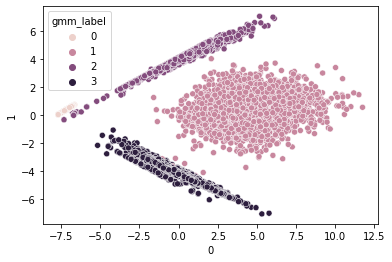

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(0,1, hue = "gmm_label", data = pca_df)

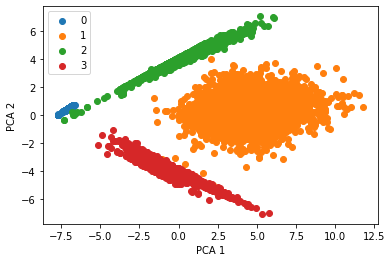

In [ ]:
for i in sorted(pca_df["gmm_label"].unique()) :
  tmp = pca_df.loc[pca_df["gmm_label"] == i]
  plt.scatter(tmp[0], tmp[1])
  plt.legend(sorted(pca_df["gmm_label"].unique()))
  plt.xlabel("PCA 1")
  plt.ylabel("PCA 2")

# 인사이트

In [ ]:
df["clusters"] = gmm_label
df

,고객번호,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간,clusters
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,3
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [ ]:
df.groupby("clusters")["고객번호"].count()

clusters
0    2040
1    2774
2    1876
3    2260
Name: 고객번호, dtype: int64

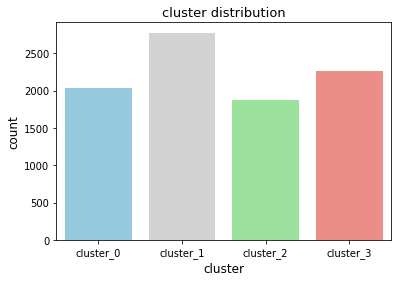

In [ ]:
y = [2040, 2774, 1876, 2260]
x = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
sns.barplot(x=x,y=y, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("cluster",fontsize=12)
plt.ylabel("count", fontsize=12)
plt.title("cluster distribution", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["잔액"].mean()

clusters
0    2149.325249
1    1805.968182
2    1437.815346
3     845.278262
Name: 잔액, dtype: float64

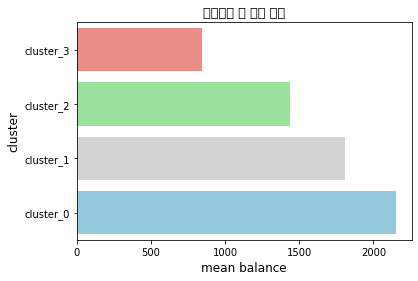

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [2149.33, 1805.97, 1437.82, 845.28]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean balance",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 잔액", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["잔액 업데이트 빈도"].mean()

clusters
0    0.882537
1    0.945825
2    0.836215
3    0.822451
Name: 잔액 업데이트 빈도, dtype: float64

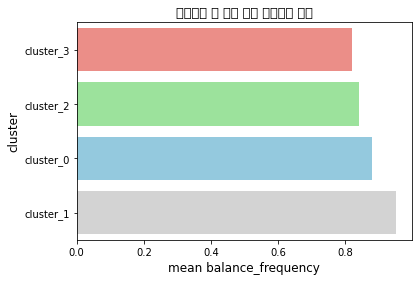

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0.88, 0.95, 0.84, 0.82]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean balance_frequency",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 잔액 업데이트 빈도", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["구매금액"].mean()

clusters
0       0.000000
1    2267.805807
2     785.920267
3     536.904217
Name: 구매금액, dtype: float64

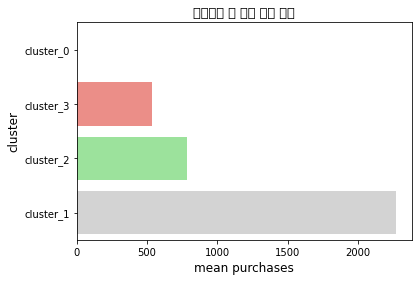

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0, 2267.81, 785.92, 536.9]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean purchases",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 구맥 금액", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["일시불 구매금액"].mean()

clusters
0       0.000000
1    1379.884427
2     785.988843
3       0.000000
Name: 일시불 구매금액, dtype: float64

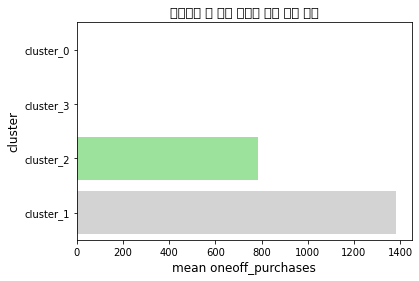

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0, 1379.88, 786, 0]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean oneoff_purchases",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 일시불 최대 구맥 금액", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["할부 구매금액"].mean()

clusters
0      0.000000
1    888.049776
2      0.000000
3    537.878469
Name: 할부 구매금액, dtype: float64

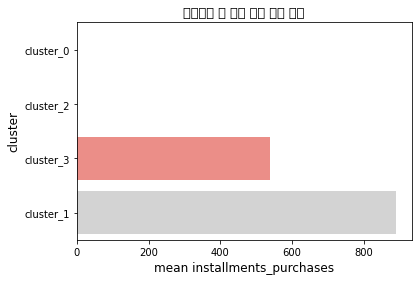

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0, 888.05, 0, 537.88]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean installments_purchases",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 할부 구맥 금액", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["현금 선지급"].mean()

clusters
0    1990.054943
1     764.226676
2     869.995820
3     419.959034
Name: 현금 선지급, dtype: float64

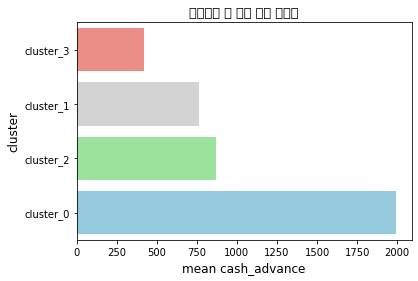

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [1990.05, 764.23, 870, 419.96]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean cash_advance",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 현금 선지급", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["구매빈도"].mean()

clusters
0    0.000163
1    0.799116
2    0.320659
3    0.694690
Name: 구매빈도, dtype: float64

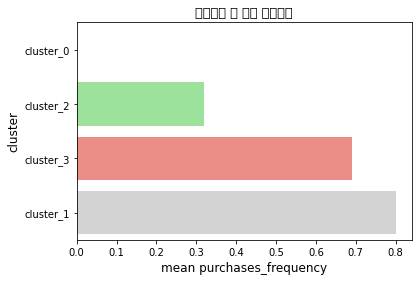

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0, 0.8, 0.32, 0.69]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean purchases_frequency",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 구매빈도", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["일회성 구매빈도"].mean()

clusters
0    0.000000
1    0.436502
2    0.320437
3    0.000000
Name: 일회성 구매빈도, dtype: float64

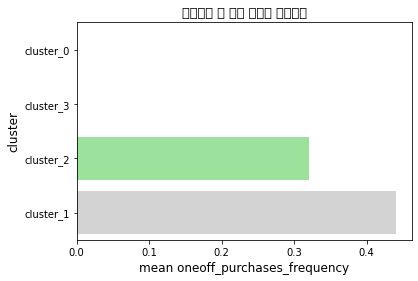

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0, 0.44, 0.32, 0]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean oneoff_purchases_frequency",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 일회성 구매빈도", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["할부 구매빈도"].mean()

clusters
0    0.000163
1    0.639229
2    0.000000
3    0.658478
Name: 할부 구매빈도, dtype: float64

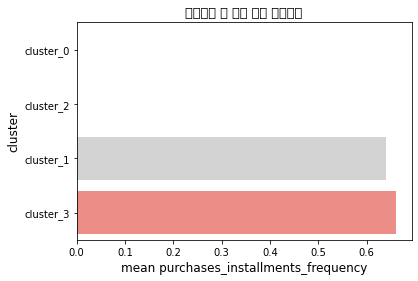

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0, 0.64, 0, 0.66]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean purchases_installments_frequency",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 할부 구매빈도", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["현금 선지급 빈도"].mean()

clusters
0    0.272832
1    0.106810
2    0.125665
3    0.053507
Name: 현금 선지급 빈도, dtype: float64

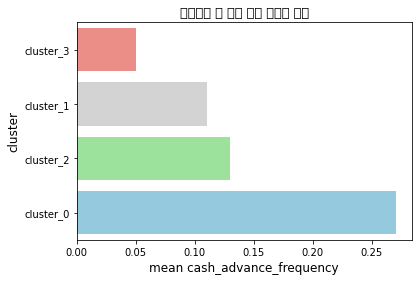

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0.27, 0.11, 0.13, 0.05]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean cash_advance_frequency",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 현금 선지급 빈도", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["현금 선지급 거래수"].mean()

clusters
0    6.300490
1    2.832733
2    2.934968
3    1.265487
Name: 현금 선지급 거래수, dtype: float64

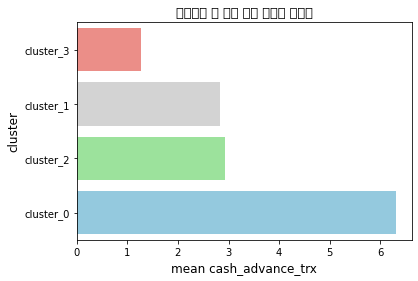

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [6.3, 2.83, 2.93, 1.27]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean cash_advance_trx",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 현금 선지급 거래수", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["구매건수"].mean()

clusters
0     0.000000
1    32.959625
2     7.103945
3    11.900885
Name: 구매건수, dtype: float64

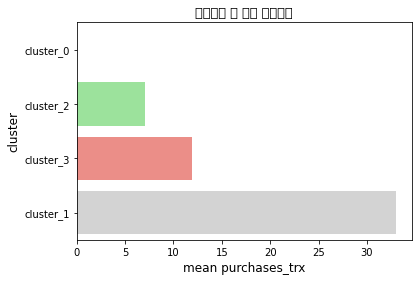

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0, 32.96, 7.1, 11.9]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean purchases_trx",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 구매건수", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["카드 한도"].mean()

clusters
0    4028.723230
1    5738.829463
2    4512.971829
3    3371.864329
Name: 카드 한도, dtype: float64

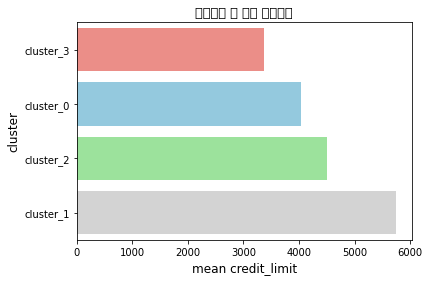

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [4028.72, 5738.83, 4512.97, 3371.86]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean credit_limit",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 카드한도", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["지불금액"].mean()

clusters
0    1654.744455
1    2545.447418
2    1507.462820
3     994.197964
Name: 지불금액, dtype: float64

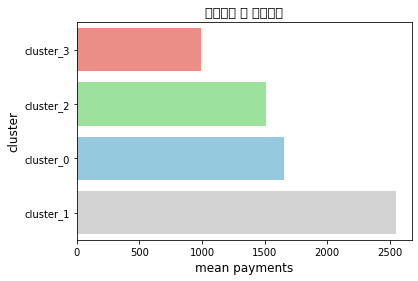

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [1654.74, 2545.45, 1507.46, 994.2]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean payments",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 지불금액", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["지불한 최소금액"].mean()

clusters
0    1004.949913
1     844.834188
2     728.115373
3     873.269061
Name: 지불한 최소금액, dtype: float64

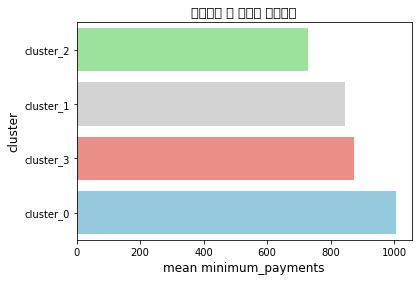

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [1004.95, 844.83, 728.12, 873.27]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean minimum_payments",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 지불한 최소금액", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["지불한 전액 지불비율"].mean()

clusters
0    0.044247
1    0.187945
2    0.102490
3    0.253031
Name: 지불한 전액 지불비율, dtype: float64

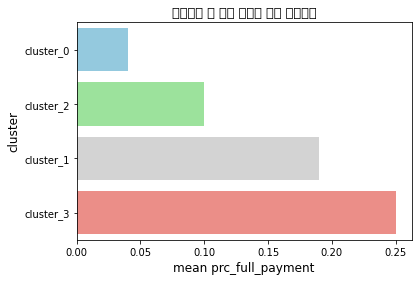

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [0.04, 0.19, 0.1, 0.25]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean prc_full_payment",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 지불한 전액 지불비율", fontsize=13)
plt.show()

In [ ]:
df.groupby("clusters")["카드 서비스 기간"].mean()

clusters
0    11.317647
1    11.735040
2    11.469616
3    11.469912
Name: 카드 서비스 기간, dtype: float64

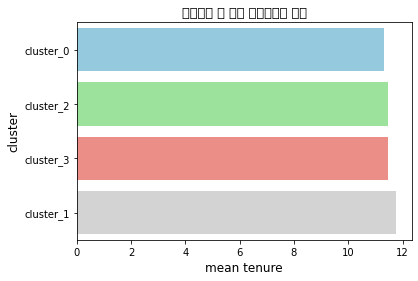

In [ ]:
names = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
weights = [11.32, 11.74, 11.47, 11.47]

sorted_w = sorted(zip(names,weights), key=lambda kv:kv[1])
n,w = zip(*sorted_w)
n = np.array(n)
w = np.array(w)
sns.barplot(x=w, y=n, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("mean tenure",fontsize=12)
plt.ylabel("cluster", fontsize=12)
plt.title("클러스터 별 평균 카드서비스 기간", fontsize=13)
plt.show()